In [8]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
import seaborn as sns


Chargement des donnees

In [3]:
url = 'german_credit_data.csv'  # Replace with the path to your dataset
data = pd.read_csv(url)
print(data.head)

<bound method NDFrame.head of     att1  att2 att3 att4  att5 att6 att7  att8 att9 att10  ...  att12 att13  \
0    A11     6  A34  A43  1169  A65  A75     4  A93  A101  ...   A121    67   
1    A12    48  A32  A43  5951  A61  A73     2  A92  A101  ...   A121    22   
2    A14    12  A34  A46  2096  A61  A74     2  A93  A101  ...   A121    49   
3    A11    42  A32  A42  7882  A61  A74     2  A93  A103  ...   A122    45   
4    A11    24  A33  A40  4870  A61  A73     3  A93  A101  ...   A124    53   
..   ...   ...  ...  ...   ...  ...  ...   ...  ...   ...  ...    ...   ...   
995  A14    12  A32  A42  1736  A61  A74     3  A92  A101  ...   A121    31   
996  A11    30  A32  A41  3857  A61  A73     4  A91  A101  ...   A122    40   
997  A14    12  A32  A43   804  A61  A75     4  A93  A101  ...   A123    38   
998  A11    45  A32  A43  1845  A61  A73     4  A93  A101  ...   A124    23   
999  A12    45  A34  A41  4576  A62  A71     3  A93  A101  ...   A123    27   

     att14 att15 att1

In [5]:
# Mapping job types to their descriptions
job_mapping = {
    'A171': 'unemployed/ unskilled non-resident',
    'A172': 'unskilled resident',
    'A173': 'skilled employee / official',
    'A174': 'management/ self-employed/ highly qualified employee/ officer'
}
data['att17'] = data['att17'].map(job_mapping)  # Updating column 'att17' to 'Job'

# Ensuring no missing values in relevant columns
data.dropna(subset=['att5', 'att17'], inplace=True)

In [7]:
# Define the model
model = ols('att5 ~ C(att17)', data=data).fit()  # 'att5' is Credit_amount, 'att17' is Job

# Perform ANOVA and display results
anova_results = sm.stats.anova_lm(model, typ=2)  # Type 2 ANOVA for unbalanced data
print(anova_results)


                sum_sq     df          F        PR(>F)
C(att17)  8.912010e+08    3.0  41.857738  1.771472e-25
Residual  7.068675e+09  996.0        NaN           NaN


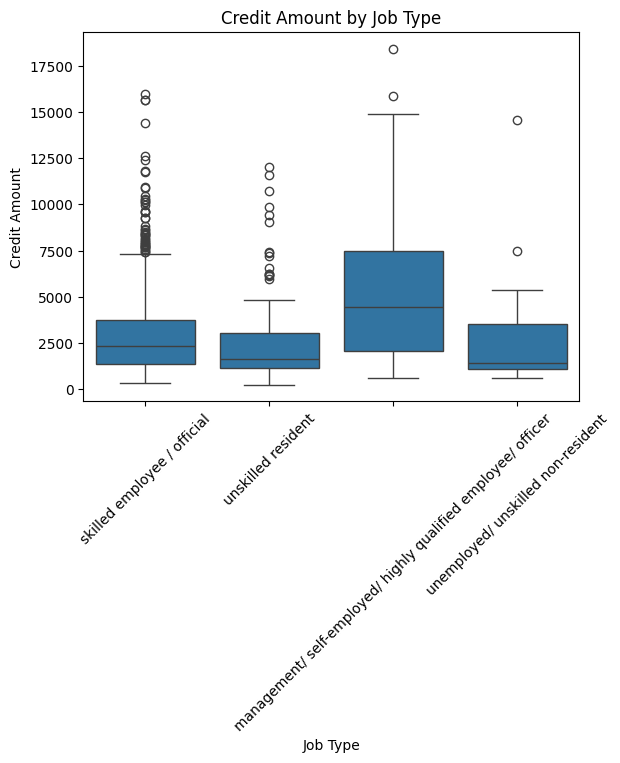

In [9]:
sns.boxplot(x='att17', y='att5', data=data)
plt.title('Credit Amount by Job Type')
plt.xlabel('Job Type')
plt.ylabel('Credit Amount')
plt.xticks(rotation=45)  # Rotate labels for better readability
plt.show()


Employé qualifié / fonctionnaire : Les montants de crédit sont généralement modestes avec peu de valeurs aberrantes élevées, indiquant une demande de crédit prudente et régulière de cette catégorie.

Résident non qualifié : Distribution étroite des montants de crédit avec une médiane légèrement supérieure à celle des employés qualifiés, montrant une certaine uniformité dans les demandes de crédit.

Employé hautement qualifié / dirigeant : Médiane élevée avec une grande variabilité dans les montants demandés et plusieurs valeurs aberrantes, reflétant des besoins financiers potentiellement plus importants ou des capacités de remboursement supérieures.

Chômeur / non qualifié non résident : La médiane la plus basse mais avec une grande variabilité et de nombreuses valeurs aberrantes, ce qui peut signaler une incertitude dans la capacité de remboursement ou des besoins financiers diversifiés.

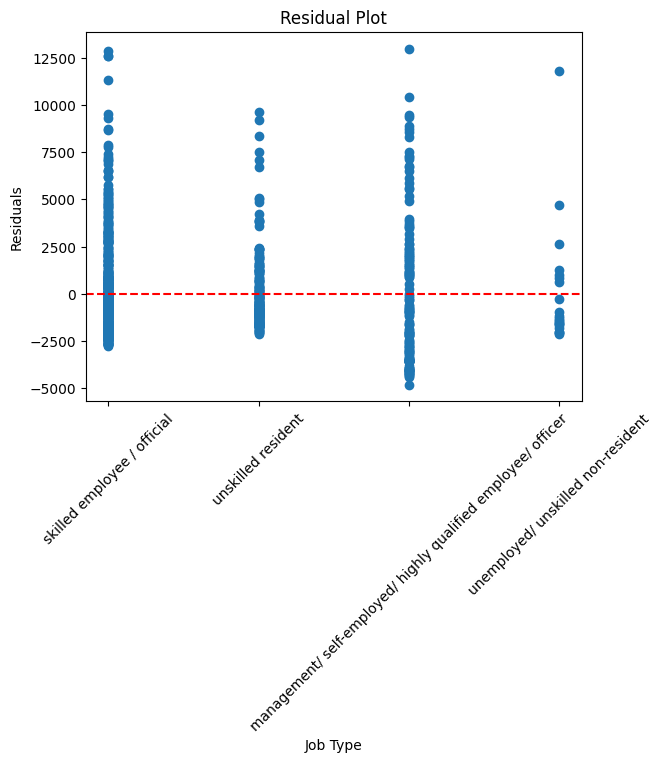

In [10]:
residuals = model.resid
fig, ax = plt.subplots()
ax.scatter(data['att17'], residuals)
ax.axhline(0, color='red', linestyle='--')
ax.set_xlabel('Job Type')
ax.set_ylabel('Residuals')
ax.set_title('Residual Plot')
plt.xticks(rotation=45)
plt.show()


Dispersion autour de zéro : Les résidus sont généralement dispersés autour de la ligne zéro, indiquant que le modèle ajuste les données de manière équilibrée.
Homogénéité des variances : La dispersion est relativement constante entre les groupes, suggérant une homogénéité des variances (homoscédasticité), malgré quelques valeurs aberrantes.
Valeurs aberrantes : Des points éloignés de la ligne zéro, particulièrement dans les catégories "employé qualifié / fonctionnaire" et "employé hautement qualifié / dirigeant", indiquent des prédictions moins précises pour ces groupes, nécessitant une enquête plus approfondie.

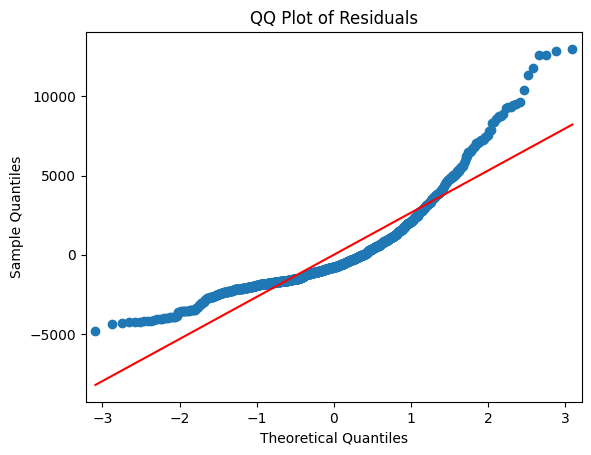

In [11]:
sm.qqplot(residuals, line='s')
plt.title('QQ Plot of Residuals')
plt.show()